In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
def adj_matrix(home_team, away_team, home_score, away_score):
    team_names = np.union1d(home_team, away_team)
    team_names_dict = {}
    for i,v in enumerate(team_names) :
        team_names_dict[v] = i

    n = len(team_names)
    A = np.zeros((n,n))
    margins = home_score - away_score
    
    for i,v in enumerate(margins):
        if v > 0:
            x_cord = team_names_dict[home_team[i]]
            y_cord = team_names_dict[away_team[i]]
            A[x_cord, y_cord] += v
        else:
            x_cord = team_names_dict[away_team[i]]
            y_cord = team_names_dict[home_team[i]]
            A[x_cord, y_cord] += abs(v)
    return team_names, A


def transition(A):
    # construct the transition matrix M
    M = A.copy()
    col_sum = A.sum(axis=0)
    for i,v in enumerate(col_sum) :
        if v != 0 :
            M[:, i] = A[:, i]/v
        else:
            M[:, i] = 1.0/A.shape[0]
    return M


def power_iteration(M,tol):
    # compute things!
    n = M.shape[1]
    x = np.random.randint(1,100,n)
    x = x/x.sum(axis=0)
    x_new = M@x
    x_new = x_new/la.norm(x_new,1)
    
    while (la.norm(abs(x_new-x),2)>=tol) :
        x = x_new
        x_new = M@x_new
        x_new = x_new/la.norm(x_new, 1)
        
    return x_new


In [3]:
home_team = ["Detroit Pistons", "Cleveland Cavaliers", "New Orleans Pelicans", "Philadelphia 76ers", "Chicago Bulls",
             "Utah Jazz", "Denver Nuggets", "Minnesota Timberwolves", "Cleveland Cavaliers", "Charlotte Hornets",
             "New York Knicks", "San Antonio Spurs", "Washington Wizards", "Dallas Mavericks", "New Orleans Pelicans",
             "Los Angeles Clippers", "Indiana Pacers", "Memphis Grizzlies", "Dallas Mavericks", "Atlanta Hawks",
             "Charlotte Hornets", "Toronto Raptors", "Miami Heat", "Minnesota Timberwolves", "Chicago Bulls",
             "Golden State Warriors", "Washington Wizards", "Oklahoma City Thunder", "Utah Jazz",
             "Portland Trail Blazers", "Los Angeles Lakers", "Brooklyn Nets", "Utah Jazz", "Sacramento Kings",
             "Brooklyn Nets", "Golden State Warriors", "Phoenix Suns", "New York Knicks", "San Antonio Spurs",
             "Orlando Magic", "Atlanta Hawks", "Dallas Mavericks", "Houston Rockets", "Denver Nuggets",
             "Milwaukee Bucks", "Milwaukee Bucks", "Memphis Grizzlies", "Oklahoma City Thunder", "Phoenix Suns",
             "Portland Trail Blazers", "San Antonio Spurs", "Cleveland Cavaliers", "Chicago Bulls", "Toronto Raptors",
             "Indiana Pacers", "Denver Nuggets", "Atlanta Hawks", "Orlando Magic", "Memphis Grizzlies", "Brooklyn Nets",
             "New York Knicks", "Los Angeles Clippers", "Orlando Magic", "Boston Celtics", "Philadelphia 76ers",
             "Toronto Raptors", "Sacramento Kings", "Portland Trail Blazers", "San Antonio Spurs",
             "Oklahoma City Thunder", "Charlotte Hornets", "Utah Jazz", "Miami Heat", "Memphis Grizzlies",
             "Washington Wizards", "Los Angeles Lakers", "Philadelphia 76ers", "Denver Nuggets", "Miami Heat",
             "Atlanta Hawks", "Milwaukee Bucks", "Toronto Raptors", "Detroit Pistons", "Houston Rockets",
             "Washington Wizards", "Minnesota Timberwolves", "New Orleans Pelicans", "Houston Rockets", "Brooklyn Nets",
             "Orlando Magic", "Golden State Warriors", "Charlotte Hornets", "Memphis Grizzlies", "Indiana Pacers",
             "Toronto Raptors", "Los Angeles Lakers", "Phoenix Suns", "Detroit Pistons", "Minnesota Timberwolves",
             "Portland Trail Blazers"]
away_team = ["Atlanta Hawks", "Chicago Bulls", "Golden State Warriors", "Boston Celtics", "Brooklyn Nets",
             "Detroit Pistons", "Houston Rockets", "Los Angeles Lakers", "Memphis Grizzlies", "Miami Heat",
             "Milwaukee Bucks", "Oklahoma City Thunder", "Orlando Magic", "Phoenix Suns", "Portland Trail Blazers",
             "Sacramento Kings", "Toronto Raptors", "Indiana Pacers", "Los Angeles Clippers", "New York Knicks",
             "Atlanta Hawks", "Boston Celtics", "Cleveland Cavaliers", "Denver Nuggets", "Detroit Pistons",
             "Houston Rockets", "Milwaukee Bucks", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns",
             "Sacramento Kings", "San Antonio Spurs", "Indiana Pacers", "Los Angeles Clippers", "Memphis Grizzlies",
             "New Orleans Pelicans", "Portland Trail Blazers", "Washington Wizards", "Boston Celtics", "Chicago Bulls",
             "Charlotte Hornets", "Los Angeles Lakers", "Miami Heat", "Oklahoma City Thunder", "Toronto Raptors",
             "Brooklyn Nets", "Golden State Warriors", "Houston Rockets", "Los Angeles Clippers",
             "Minnesota Timberwolves", "New York Knicks", "Philadelphia 76ers", "Charlotte Hornets", "Dallas Mavericks",
             "Detroit Pistons", "Los Angeles Lakers", "Miami Heat", "New Orleans Pelicans", "Sacramento Kings",
             "Atlanta Hawks", "Cleveland Cavaliers", "Golden State Warriors", "Houston Rockets", "Indiana Pacers",
             "Milwaukee Bucks", "Oklahoma City Thunder", "Phoenix Suns", "Utah Jazz", "Washington Wizards",
             "Chicago Bulls", "Dallas Mavericks", "Denver Nuggets", "Minnesota Timberwolves", "Portland Trail Blazers",
             "Boston Celtics", "Brooklyn Nets", "Cleveland Cavaliers", "Golden State Warriors", "Indiana Pacers",
             "New Orleans Pelicans", "New York Knicks", "Orlando Magic", "Phoenix Suns", "Sacramento Kings",
             "Atlanta Hawks", "Chicago Bulls", "Dallas Mavericks", "Los Angeles Clippers", "Milwaukee Bucks",
             "Philadelphia 76ers", "Sacramento Kings", "San Antonio Spurs", "Utah Jazz", "Cleveland Cavaliers",
             "Miami Heat", "New York Knicks", "Oklahoma City Thunder", "Portland Trail Blazers", "Atlanta Hawks",
             "Denver Nuggets"]
home_score = [106.0, 95.0, 95.0, 95.0, 115.0, 87.0, 105.0, 112.0, 106.0, 94.0, 122.0, 106.0, 88.0, 111.0, 94.0, 111.0,
              99.0, 112.0, 88.0, 112.0, 94.0, 113.0, 92.0, 95.0, 94.0, 112.0, 118.0, 139.0, 99.0, 92.0, 114.0, 75.0,
              97.0, 109.0, 91.0, 134.0, 101.0, 117.0, 95.0, 87.0, 94.0, 103.0, 89.0, 93.0, 87.0, 103.0, 69.0, 105.0,
              96.0, 106.0, 94.0, 107.0, 105.0, 102.0, 94.0, 120.0, 98.0, 103.0, 103.0, 87.0, 86.0, 108.0, 114.0, 98.0,
              87.0, 103.0, 97.0, 108.0, 99.0, 98.0, 108.0, 96.0, 96.0, 96.0, 98.0, 104.0, 102.0, 104.0, 87.0, 121.0,
              99.0, 87.0, 100.0, 116.0, 99.0, 102.0, 98.0, 109.0, 86.0, 105.0, 103.0, 94.0, 79.0, 97.0, 76.0, 95.0,
              103.0, 120.0, 117.0, 104.0]
away_score = [94.0, 97.0, 111.0, 112.0, 100.0, 92.0, 85.0, 111.0, 76.0, 104.0, 97.0, 112.0, 87.0, 95.0, 112.0, 104.0,
              106.0, 103.0, 104.0, 101.0, 97.0, 103.0, 102.0, 78.0, 98.0, 92.0, 113.0, 136.0, 71.0, 110.0, 132.0, 102.0,
              76.0, 114.0, 101.0, 120.0, 90.0, 110.0, 87.0, 92.0, 92.0, 93.0, 109.0, 117.0, 106.0, 96.0, 119.0, 110.0,
              102.0, 101.0, 84.0, 100.0, 130.0, 91.0, 82.0, 109.0, 92.0, 94.0, 89.0, 101.0, 96.0, 112.0, 119.0, 100.0,
              91.0, 98.0, 118.0, 92.0, 102.0, 104.0, 94.0, 84.0, 84.0, 115.0, 118.0, 98.0, 108.0, 119.0, 90.0, 115.0,
              92.0, 92.0, 92.0, 110.0, 114.0, 93.0, 107.0, 105.0, 94.0, 97.0, 94.0, 114.0, 89.0, 101.0, 96.0, 99.0,
              124.0, 103.0, 107.0, 108.0]
home_team = np.array(home_team)
away_team = np.array(away_team)
home_score = np.array(home_score)
away_score = np.array(away_score)

In [4]:
team_names, A = adj_matrix(home_team, away_team, home_score, away_score)
M = transition(A)
x = power_iteration(M,tol=1.0e-8)

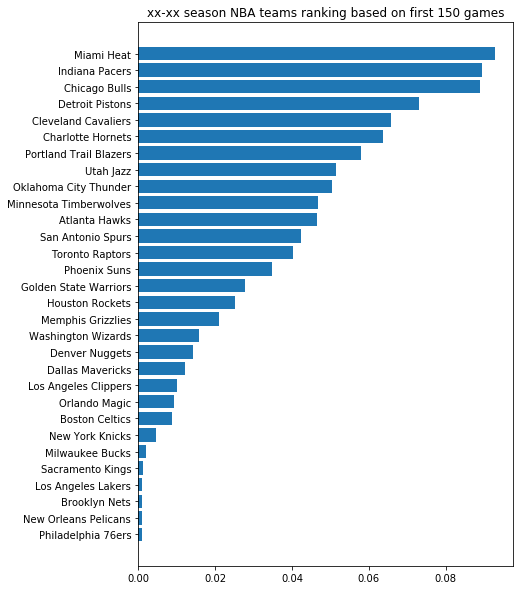

In [5]:
## Create a Horizontal bar plot for the percentage of fan support for each team
## (following the order of team_ranks - "best" to "worst" team)
team_dict = {}
for i,v in enumerate(team_names) :
    team_dict[v] = x[i]
    
team_list = sorted(team_dict.items(), key=lambda x:(-x[1],x[0]))
team_ranks = [tup[0] for tup in team_list]

bar_height = [tup[1] for tup in team_list]
y_label = team_ranks


f, axs = plt.subplots(1,1,figsize=(8,10))
plt.subplots_adjust(left=0.25)
y_axis = range(len(team_ranks))
plt.barh(y_axis, bar_height)
plt.yticks(y_axis, y_label)
plt.title( 'xx-xx season NBA teams ranking based on first 150 games')
axs.invert_yaxis()